# Normality of Errors

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import math
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [4]:
start = time.time()

# 1. Model to fit

We going to fit an harmonic regression.

In [5]:
df = pd.read_csv('Temp.csv', skiprows = [3652])

In [6]:
df = df.rename(columns = {'Date': 'Time', 'Daily minimum temperatures in Melbourne, Australia, 1981-1990': 'X_t'})

In [7]:
df['Time'] = pd.to_datetime(df['Time'])

In [8]:
def transform_date(date):

    try:

        new_date = date.year + (date.month - 1)/12 + date.day/365

        return new_date
    
    except:

        return float('nan')

In [9]:
def transform_value(value):

    try:

        return float(value)
    
    except:

        return float('nan')

In [10]:
df['Time'] = df['Time'].map(lambda x: transform_date(x))

In [11]:
df['X_t'] = df['X_t'].map(lambda x: transform_value(x))

In [12]:
df = df.dropna()

### Temperature

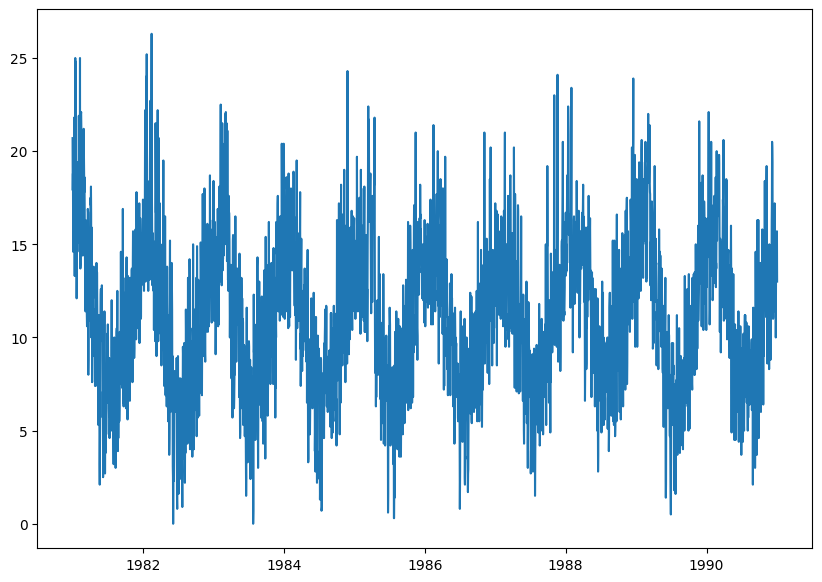

In [13]:
plt.figure(figsize = (10, 7))
plt.plot(df['Time'], df['X_t'])
plt.show()

In [14]:
df['cos'] = np.cos(df['Time']*2*math.pi)
df['sin'] = np.sin(df['Time']*2*math.pi)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression().fit(df[['cos', 'sin']], df['X_t'])

In [17]:
df['S_t'] = reg.predict(df[['cos', 'sin']])

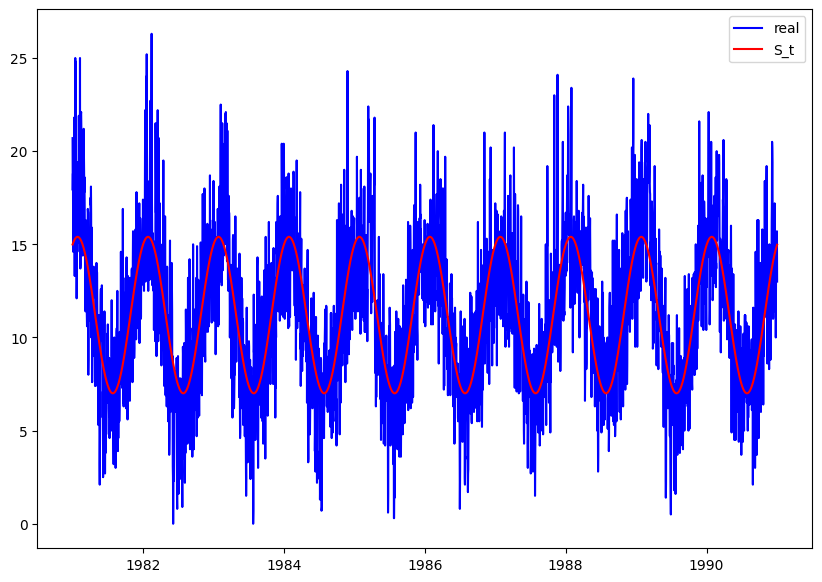

In [18]:
plt.figure(figsize = (10, 7))
plt.plot(df['Time'], df['X_t'], color = 'blue', label = 'real')
plt.plot(df['Time'], df['S_t'], color = 'red', label = 'S_t')
plt.legend()
plt.show()

In [19]:
df['N_t'] = df['X_t'] - df['S_t']

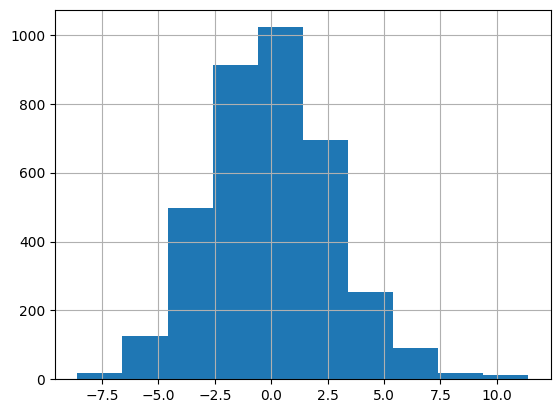

In [20]:
df['N_t'].hist()
plt.show()

In [21]:
df['N_t_norm'] = (df['N_t'] - df['N_t'].mean())/df['N_t'].std()

# 2. Hypothesis Test: Kolmogorov Smirnov

### Sample Normal

In [22]:
mean = 0
std = 1 
num_samples = 10_000
samples = np.random.normal(mean, std, size = num_samples)

In [23]:
df_s = pd.DataFrame()
df_s['N_t'] = samples

In [24]:
from statsmodels.distributions.empirical_distribution import ECDF

In [25]:
ecdf_1 = ECDF(df['N_t_norm'])
ecdf_2 = ECDF(df_s['N_t'])

In [26]:
grid = np.sort(df_s['N_t'].unique())

In [27]:
prob_1 = ecdf_1(grid)
prob_2 = ecdf_2(grid)

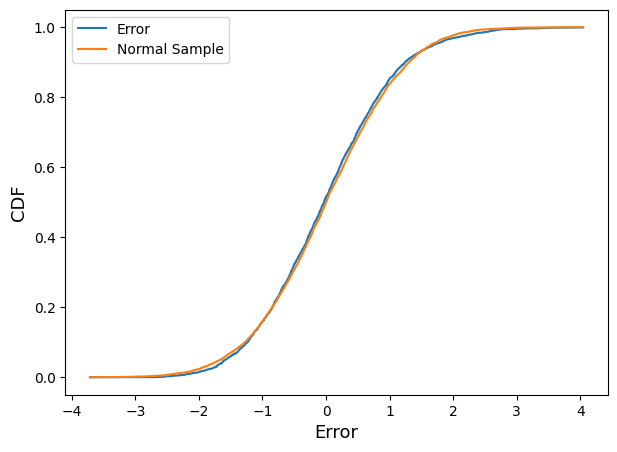

In [28]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7, 5))
ax.plot(grid, prob_1, label = 'Error')
ax.plot(grid, prob_2, label = 'Normal Sample')
ax.set_ylabel("CDF", fontsize = 13)
ax.set_xlabel("Error", fontsize = 13)
ax.legend()
plt.show()

In [29]:
from scipy.stats import ks_2samp

In [30]:
ht_info = ks_2samp(
    df['N_t_norm'],
    df_s['N_t']
)

In [31]:
round(ht_info.pvalue*100, 2)

11.62

**Comments:** How $p_{value} > 0.05$ then we can't reject the null hypotesis that says both data have the same distribution. That is to say, the error of the model is normal.

### Time of execution

In [32]:
end = time.time()

In [33]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 1 seconds.
